In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [45]:
# Load Dataset
df = pd.read_csv("iris.csv")  # Adjust dataset path if needed


In [47]:
# Selecting features and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_id']

In [49]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(20, 10), (30, 15), (40, 20)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.05]
}

In [55]:
# Train MLP with Grid Search
mlp = MLPClassifier(max_iter=1000, activation='relu', solver='adam', early_stopping=True, random_state=42)


In [24]:
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(20, 10), (30, 15), (40, 20)],
                         'learning_rate_init': [0.001, 0.01, 0.05]},
             scoring='accuracy')

In [57]:
# Best Model
best_model = grid_search.best_estimator_

In [59]:
# Predict
y_pred = best_model.predict(X_test)


In [27]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Optimized Model Accuracy: 0.800

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.83      0.50      0.62        10
           3       0.64      0.90      0.75        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.79        30
weighted avg       0.83      0.80      0.79        30



In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

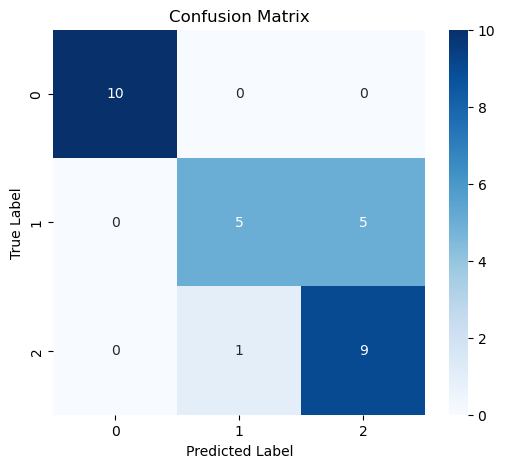

In [29]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [30]:

# ✅ Check if grid_search exists before printing best params
if 'grid_search' in locals():
    print("\nBest Hyperparameters:", grid_search.best_params_)
else:
    print("Error: grid_search is not defined.")


Best Hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (40, 20), 'learning_rate_init': 0.05}
